# deBoer et al 2020 Exploratory Data Analysis Notebook

**Authorship:**
Adam Klie, *10/28/2021*
***
**Description:**
Notebook to perfrom an initial exploratory data analysis of the MPRA data available from the paper:[Deciphering eukaryotic gene-regulatory logic with 100 million random promoters].(https://pubmed.ncbi.nlm.nih.gov/31792407/)
***
**TODOs:**
 - <font color='green'> Done TODO </font>
 - <font color='red'> Move onto preprocessing for loading into regression models </font>
***

## Set-up

In [2]:
# Classics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Helpful libraries
import tqdm
from pandas_profiling import ProfileReport

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Load dataset
This particular file was downloaded from GEO from accession: **GSE104878**. It contains only two columns:
 1. **SEQUENCE** - the promoter sequence assayed
 2. **ACTIVITY** - Expression level as quantified in deBoer et al

In [5]:
deBoer_data = pd.read_csv("GSE104878_20160609_average_promoter_ELs_per_seq_pTpA_ALL.shuffled.txt", sep="\t", header=None)
deBoer_data.columns = ["SEQUENCE", "ACTIVITY"]
deBoer_data.head(1)

,SEQUENCE,ACTIVITY
0,TGCATTTTTTTCACATCGGAATGGTGTTGTCGACCTTGCCTTCATA...,7.0


# Exploratory data analysis (EDA)

## **Q1:** Length of sequences

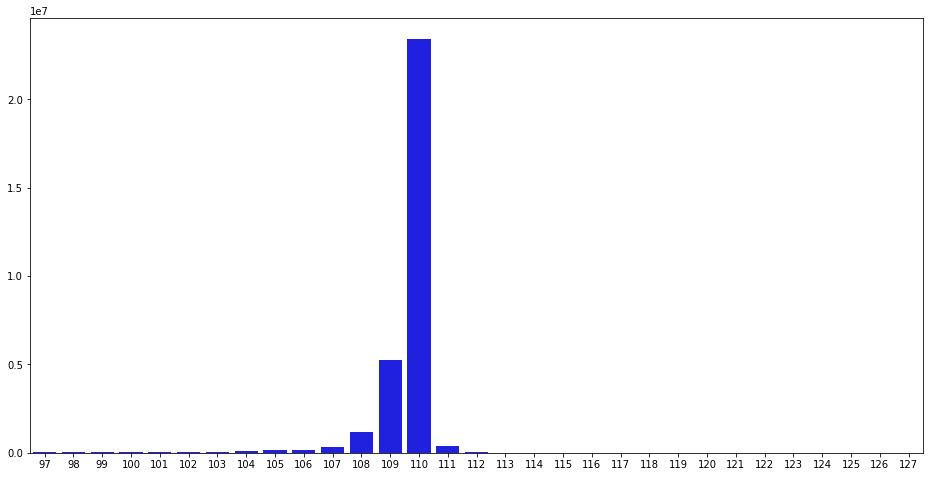

In [6]:
# Raw sequence lengths
fig, ax = plt.subplots(figsize=(16,8))
plt_data = deBoer_data['SEQUENCE'].apply(len).value_counts().astype(object) 
plt_data = plt_data[plt_data >= 10]
sns.barplot(x=plt_data.index, y=plt_data.values, color='blue', ax=ax);

## Q2: Distribution of nucleotides

In [15]:
seqs = []
for i, seq in enumerate(tqdm.tqdm(deBoer_data["SEQUENCE"].values)):
    if len(seq) < 110:
        seq += ''.join(['N'] * (110-len(seq)))  # Pad with N's if less than 69bp

    if len(seq) > 110:
        seq = seq[:110]
    
    seqs.append(seq)

100%|██████████| 31349363/31349363 [00:22<00:00, 1402501.12it/s]


In [21]:
def freq_lists(dna_list):
    n = len(dna_list[0])
    A = [0]*n
    T = [0]*n
    G = [0]*n
    C = [0]*n
    N = [0]*n
    for i, dna in enumerate(tqdm.tqdm(dna_list)):
        for index, base in enumerate(dna):
            if base == 'A':
                A[index] += 1
            elif base == 'C':
                C[index] += 1
            elif base == 'G':
                G[index] += 1
            elif base == 'T':
                T[index] += 1
            else:
                N[index] += 1
    return A, C, G, T, N

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

100%|██████████| 10000/10000 [00:00<00:00, 50914.97it/s]


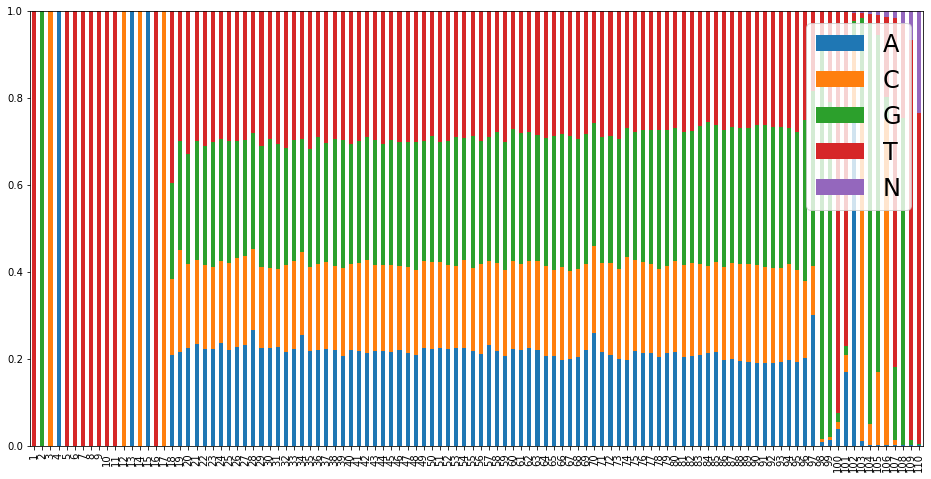

In [34]:
pos_counts = pd.DataFrame(freq_lists(np.random.choice(seqs, 10000)))
pos_freqs = pos_counts/(pos_counts.sum(axis=0))
pos_freqs.index = pd.Index(['A', 'C', 'G', 'T', 'N'])
pos_freqs.columns = range(1, len(seqs[0])+1)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(0, 1)
pos_freqs.T.plot(kind='bar', stacked=True, ax=ax)
move_legend(ax, 1, fontsize=24)

## **Q2:** Distribution of activities

Text(0.5, 0, 'Expression level')

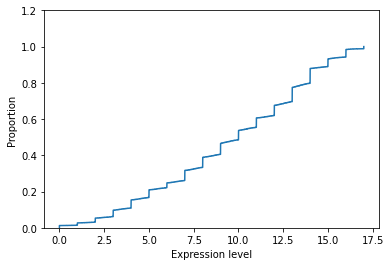

In [35]:
# Check distributions of average RPMs
ax = sns.ecdfplot(deBoer_data["ACTIVITY"].values)
ax.set_ylim(0, 1.2)
ax.set_xlabel('Expression level');

<AxesSubplot:ylabel='Frequency'>

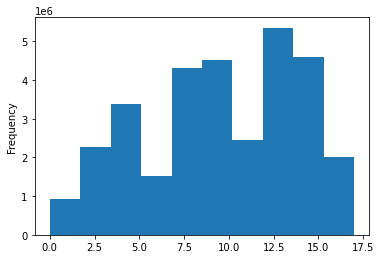

In [36]:
deBoer_data["ACTIVITY"].plot(kind="hist")

# Scratch
Place for old or testing code

# References